<a href="https://colab.research.google.com/github/JordMuff2710/PRA3024_AnalysisBigDataPhysics/blob/master/LHCb_FullVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [1]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2020-03-09 22:48:33--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.7’

root_v6.13.08.Linux 100%[===================>] 131.05M  24.0MB/s    in 6.2s    

2020-03-09 22:48:40 (21.2 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.7’ saved [137415272/137415272]



In [2]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

<CDLL '/content/APPS/root/lib/libMathMore.so', handle 55a27e61f400 at 7faf9f8ac150>

In the first part we give a small introduction on how to work with the graphs and how a histogram (random) can be made in ROOT.

Welcome to JupyROOT 6.13/08


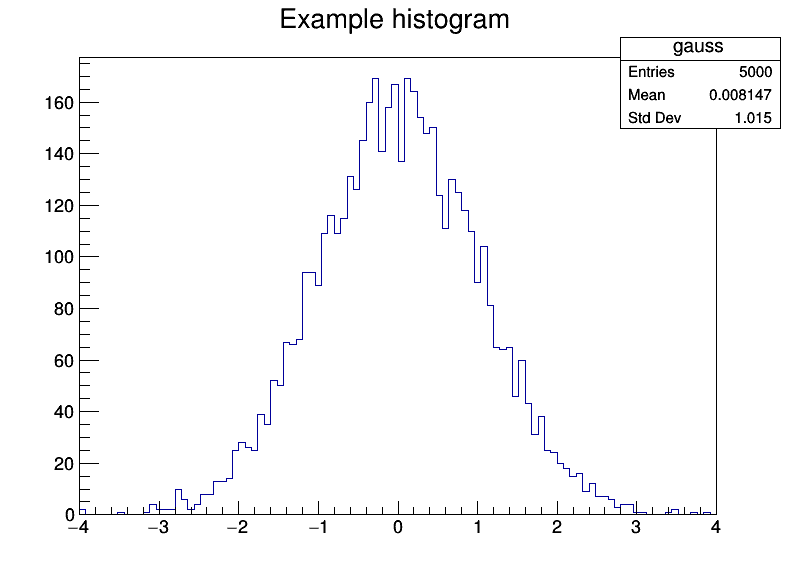

In [3]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [4]:
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-09 22:48:48--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.93.89, 188.184.28.138, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.7’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  23.2MB/s    in 19s     

2020-03-09 22:49:08 (22.1 MB/s) - ‘B2HHH_MagnetUp.root.7’ saved [444723234/444723234]



With all the data available, we can start working on processing the data. The first step that we want to do, is to open the specific file (namely, MagnetUp). There are several data files we can access. Firstly we want to take a look at the momentum (in x, y & z direction. Where H1, is one of the daughter particles coming form the searched particle, which for us is the B meson. 

We can plot from each daughter and each direction its momentum, where here is the momentum in the x direction is shown for the H1. 


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


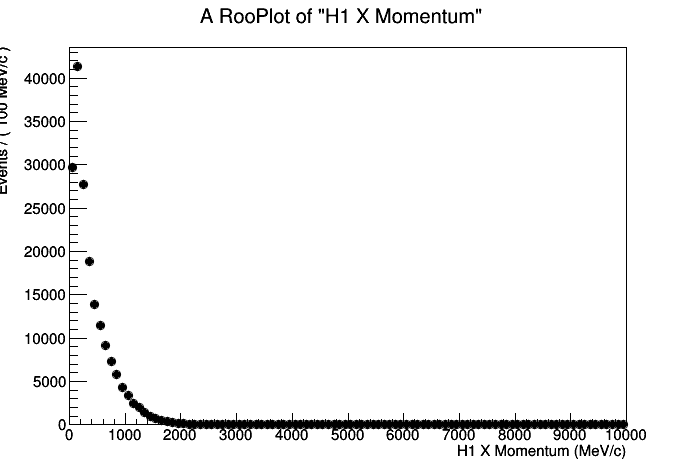

In [5]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#What is our goal? 

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

In [0]:
from math import *

#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:

def p_tot(daughter):
  p_tot = "sqrt(("+daughter+"_PX)**2 + ("+daughter+"_PY)**2 + ("+daughter+"_PZ)**2)"
  return p_tot

Now plot the total momentum for one (or more) of the daughter particles.

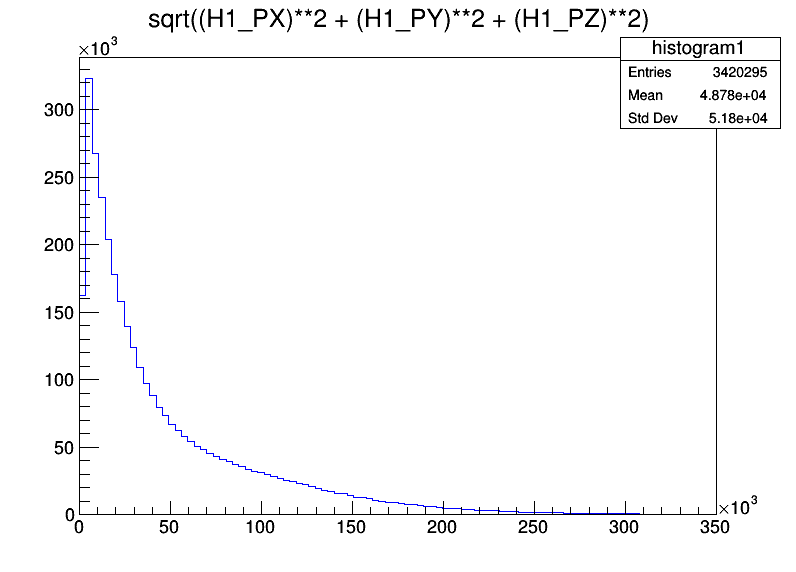

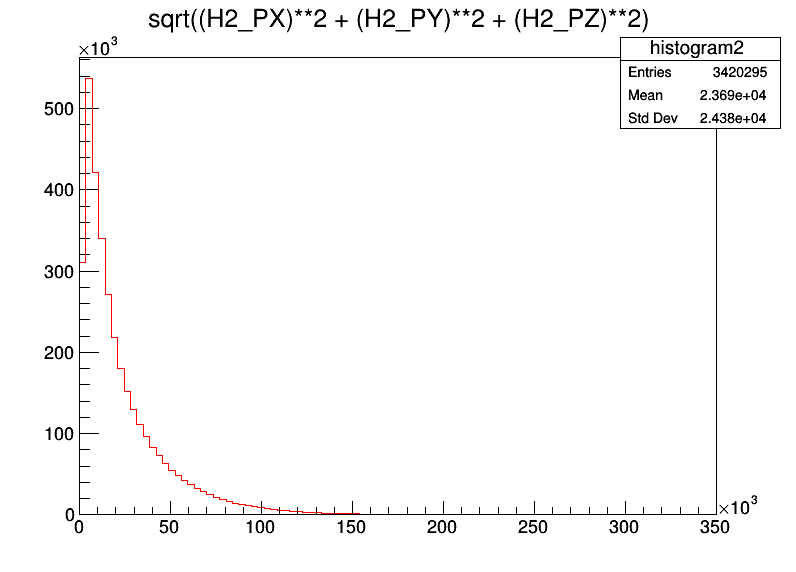

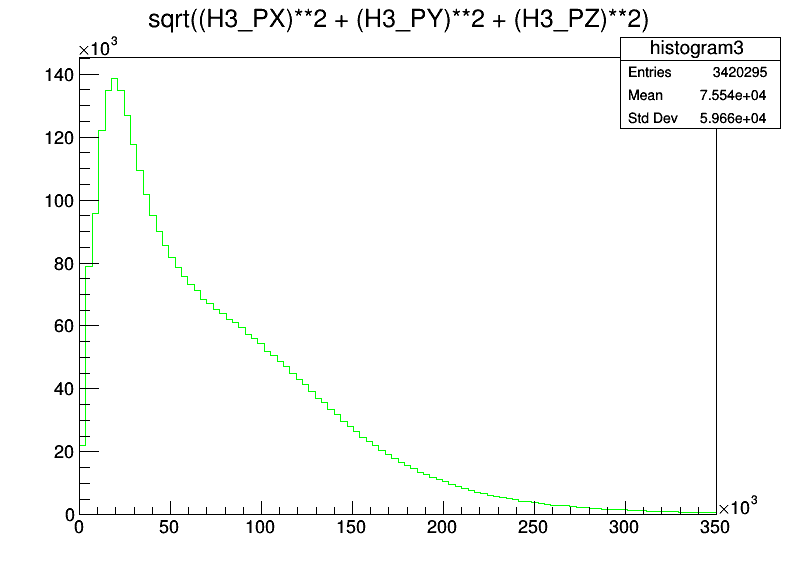

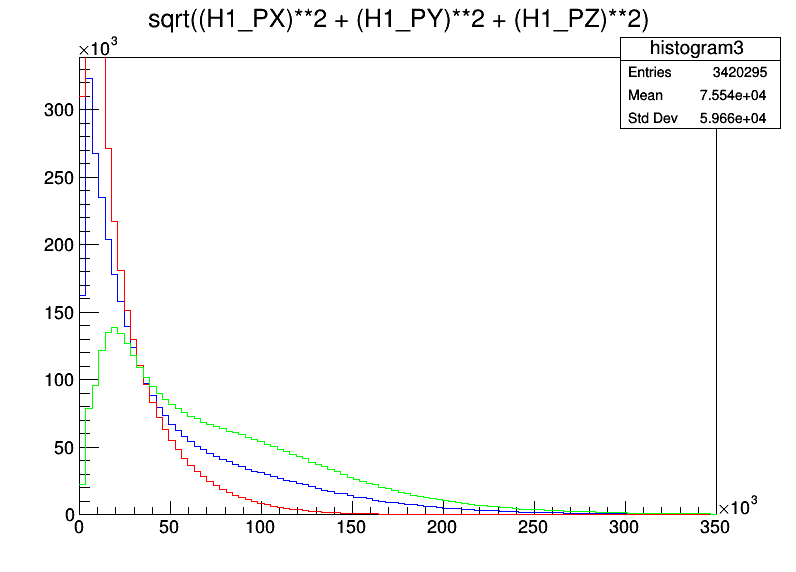

In [8]:
#use the histogram plotting tools, call your function to find the total momentum and then plot it!

#Where we get the data from# 
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
######################### H1-diagram ##################################
c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title",800,600)

tree.Draw(p_tot("H1")+">>histogram1(100,0,350000)")

histogram1 = ROOT.gDirectory.Get("histogram1")

c1.Draw()
######################### H2-diagram ##################################
c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title",800,600)

tree.Draw(p_tot("H2")+">>histogram2(100,0,350000)")

histogram2 = ROOT.gDirectory.Get("histogram2")

c2.Draw()
######################### H3-diagram ##################################
c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title",800,600)

tree.Draw(p_tot("H3")+">>histogram3(100,0,350000)")

histogram3 = ROOT.gDirectory.Get("histogram3")

c3.Draw()
######################### 1 diagram with all 3 of them ##############
c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title",800,600)

histogram1.SetLineColor(4)
histogram1.Draw()
histogram2.SetLineColor(2)
histogram2.Draw('same')
histogram3.SetLineColor(3)
histogram3.Draw('same')

c4.Draw()

The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

sqrt(sqrt((H1_PX)**2 + (H1_PY)**2 + (H1_PZ)**2)**2 + (493.677)**2)


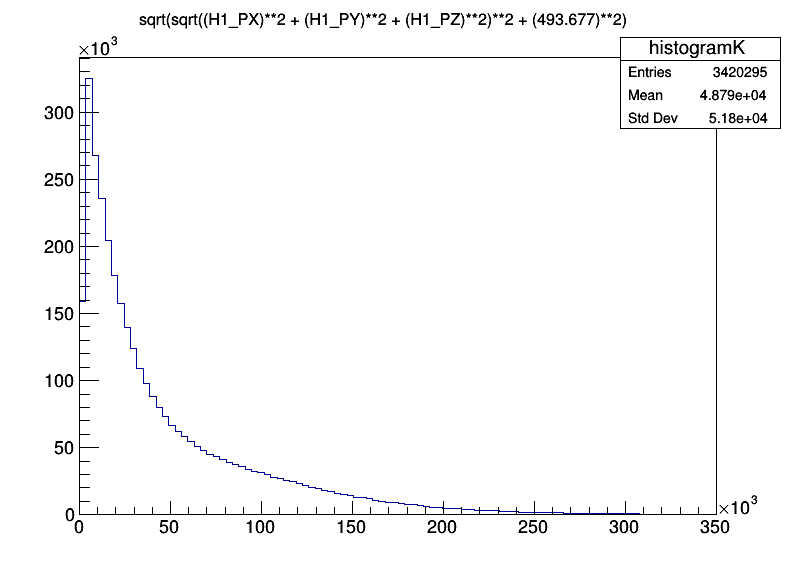

In [9]:
#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily

def Energy_K(daughter):
  Mass_K = 493.677 #MeV/c²
  Energy = "sqrt("+p_tot(daughter)+"**2 + ("+str(Mass_K)+")**2)"
  return Energy
print(Energy_K("H1"))
#Checking the results by plotting the histogram 
cK = ROOT.TCanvas("myCanvasNameK","The Canvas Title",800,600)

tree.Draw(Energy_K("H1")+">>histogramK(100,0,350000)")

histogramK = ROOT.gDirectory.Get("histogramK")

cK.Draw()

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>, where our first step is calculating the general energy of the B meson (by graphing). 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameEB


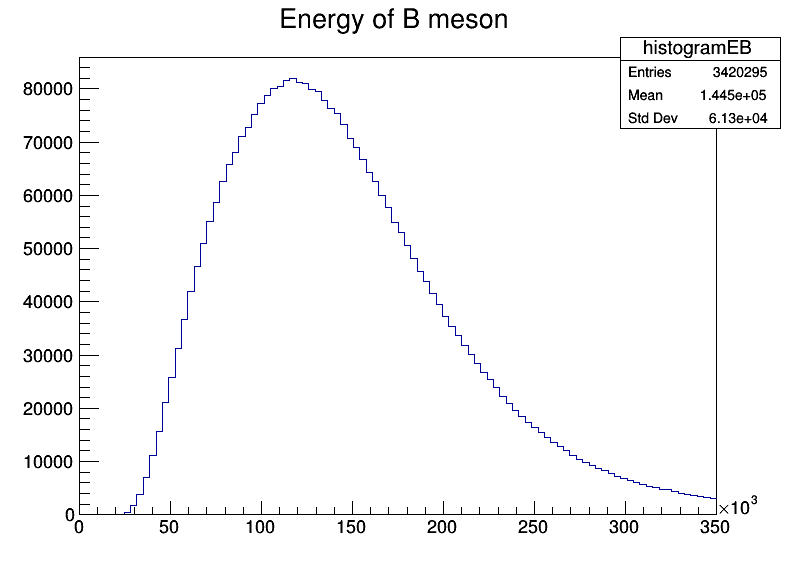

In [24]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total

def Energy_B(Energy_K):
  Energy_B = Energy_K("H1")+ "+" +Energy_K("H2")+ "+" +Energy_K("H3")
  return Energy_B

cEB = ROOT.TCanvas("myCanvasNameEB","The Canvas Title",800,600)

tree.Draw(Energy_B(Energy_K)+">>histogramEB(100,0,350000)")

histogramEB = ROOT.gDirectory.Get("histogramEB")
histogramEB.SetTitle("Energy of B meson")
cEB.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameMB


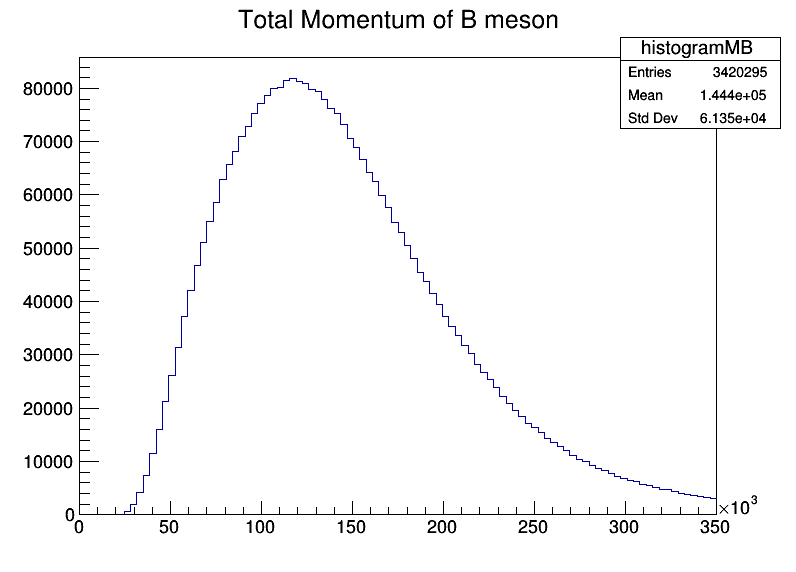

In [23]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

#to get a total x momentum of the mother; then you can combine your three momenta into total momentum
def MomentumB():
  xtot = "(H1_PX + H2_PX + H3_PX)"
  ytot = "(H1_PY + H2_PY + H3_PY)"
  ztot = "(H1_PZ + H2_PZ + H3_PZ)"

  Ptot = "sqrt(" + xtot + "**2 + " + ytot +  "**2 + " + ztot +  "**2)"
  return Ptot

cMB = ROOT.TCanvas("myCanvasNameMB","The Canvas Title",800,600)
tree.Draw(MomentumB()+">>histogramMB(100,0,350000)")
histogramMB = ROOT.gDirectory.Get("histogramMB")
histogramMB.SetTitle("Total Momentum of B meson")
cMB.Draw()

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we used earlier for the Kaon calculations).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


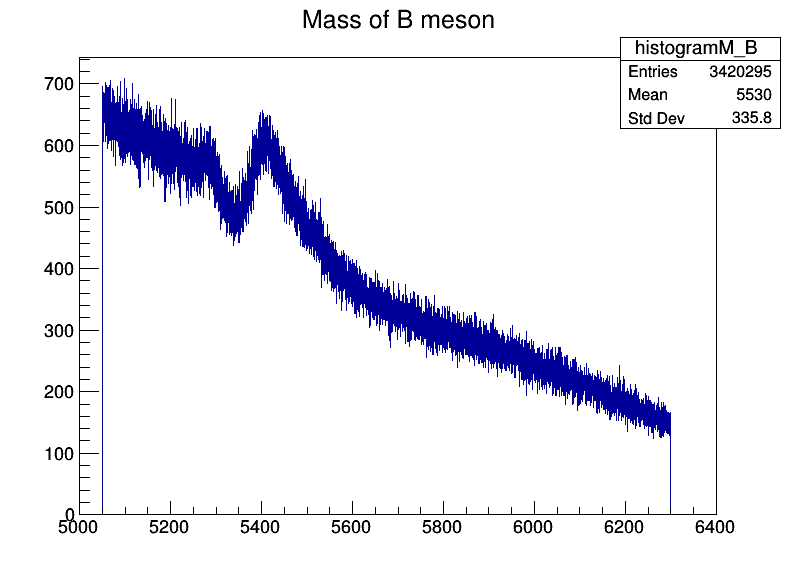

In [25]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)

def Mass_B(Energy_B, MomentumB):
  MassB = "sqrt(("+Energy_B+")**2 - ("+MomentumB+")**2)"
  return MassB

cM_B = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(Mass_B(Energy_B(Energy_K), MomentumB())+">>histogramM_B(10000,5000,6400)")
histogramM_B = ROOT.gDirectory.Get("histogramM_B")
histogramM_B.SetTitle("Mass of B meson")
cM_B.Draw()

We plotted the graph for the masses of the B meson in a previous of the code. When looking at the result we found in the graphs and compare it to the actual mass of a B meson (which is 5279.29 ± 015). We can see that the values are close to eachother. Also, keeping the standard deviation in mind, we see have some 'spreading' where the actual value can be in the graph. 

#Part 2: Curve Fitting

In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have *any muons* in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


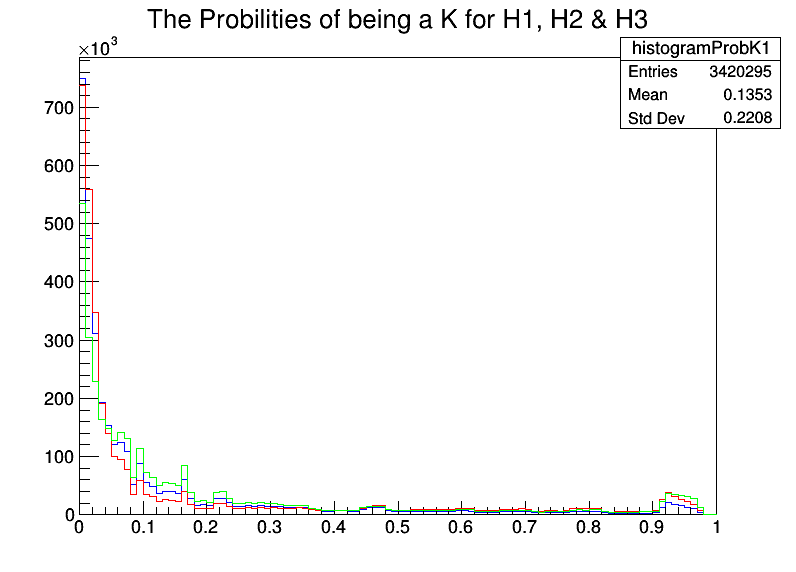

In [13]:
#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2

# Now we create a canvas, plot our data onto the canvas and draw it:
cProbK = ROOT.TCanvas("c","Probabilities of K", 800, 600)

tree.Draw("H1_ProbK>>histogramProbK1(100,0,1)")
tree.Draw("H2_ProbK>>histogramProbK2(100,0,1)")
tree.Draw("H3_ProbK>>histogramProbK3(100,0,1)")

histogramProbK1 = ROOT.gDirectory.Get("histogramProbK1")
histogramProbK2 = ROOT.gDirectory.Get("histogramProbK2")
histogramProbK3 = ROOT.gDirectory.Get("histogramProbK3")

histogramProbK1.SetLineColor(4)
histogramProbK1.SetTitle("The Probilities of being a K for H1, H2 & H3")
histogramProbK1.Draw()
histogramProbK2.SetLineColor(2)
histogramProbK2.Draw('same')
histogramProbK3.SetLineColor(3)
histogramProbK3.Draw('same')

cProbK.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


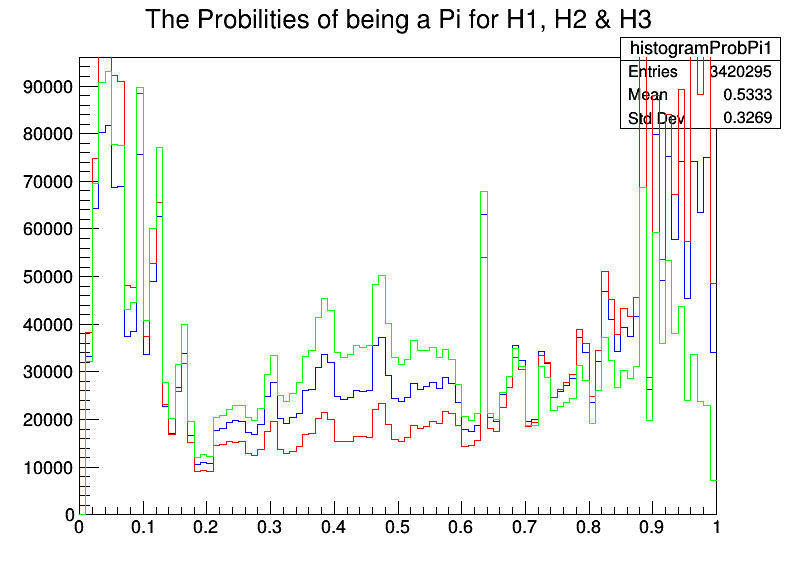

In [14]:
cProbPi = ROOT.TCanvas("c","Probabilities of Pi", 800, 600)

tree.Draw("H1_ProbPi>>histogramProbPi1(100,0,1)")
tree.Draw("H2_ProbPi>>histogramProbPi2(100,0,1)")
tree.Draw("H3_ProbPi>>histogramProbPi3(100,0,1)")

histogramProbPi1 = ROOT.gDirectory.Get("histogramProbPi1")
histogramProbPi2 = ROOT.gDirectory.Get("histogramProbPi2")
histogramProbPi3 = ROOT.gDirectory.Get("histogramProbPi3")

histogramProbPi1.SetLineColor(4)
histogramProbPi1.SetTitle("The Probilities of being a Pi for H1, H2 & H3")
histogramProbPi1.Draw()
histogramProbPi2.SetLineColor(2)
histogramProbPi2.Draw('same')
histogramProbPi3.SetLineColor(3)
histogramProbPi3.Draw('same')

cProbPi.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


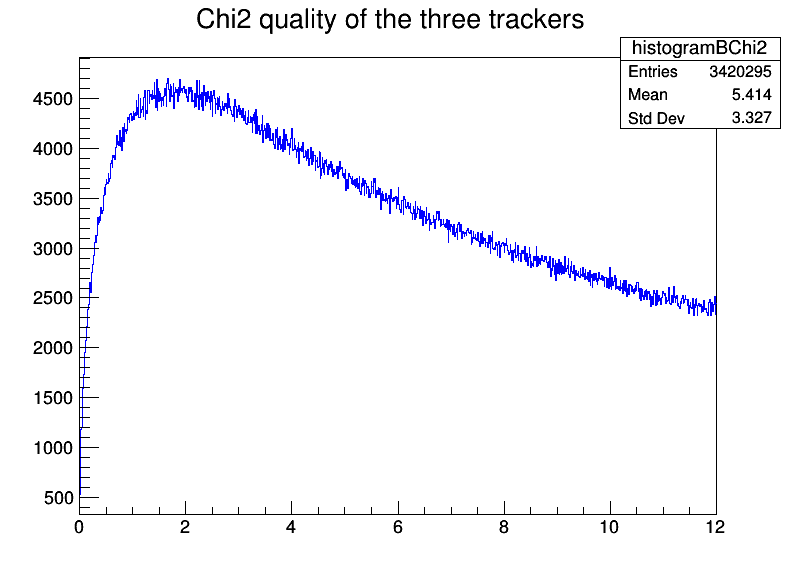

In [15]:
cBChi2 = ROOT.TCanvas("c","Chi2 quality of the three trackers", 800, 600)

tree.Draw("B_VertexChi2>>histogramBChi2(1000,0,12)")

histogramBChi2 = ROOT.gDirectory.Get("histogramBChi2")

histogramBChi2.SetLineColor(4)
histogramBChi2.SetTitle("Chi2 quality of the three trackers")
histogramBChi2.Draw()

cBChi2.Draw()

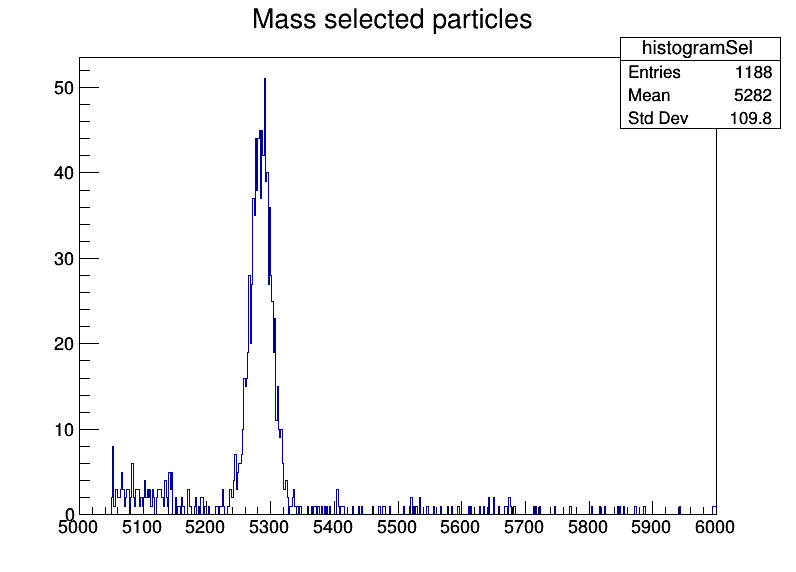

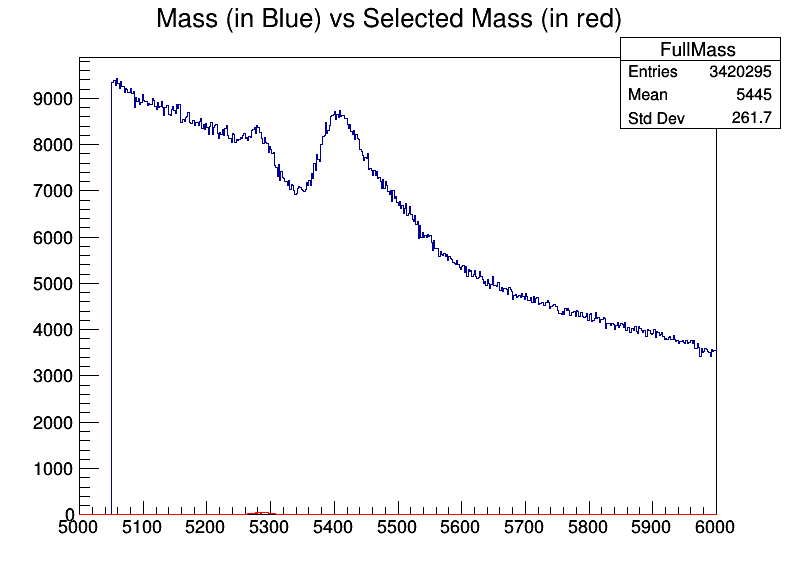

In [16]:
#Using these plots, we can now make a preselection string. This is a text string that looks like 
selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon")

#To apply the selection - we can use the copytree command:
CutTree=tree.CopyTree(selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

cSel = ROOT.TCanvas("SelectedMass","Selected_Mass",800,600)
CutTree.Draw(Mass_B(Energy_B(Energy_K), MomentumB())+">>histogramSel(500,5000,6000)")
histogramSel = ROOT.gDirectory.Get("histogramSel")
histogramSel.SetTitle("Mass selected particles")
cSel.Draw()

c = ROOT.TCanvas("comparedMass","compared_Mass",800,600)

CutTree.Draw(Mass_B(Energy_B(Energy_K), MomentumB())+">>SelectedMass(500,5000,6000)")
tree.Draw(Mass_B(Energy_B(Energy_K), MomentumB())+">>FullMass(500,5000,6000)")


HistogramFull = ROOT.gDirectory.Get("FullMass")
histogramSelected = ROOT.gDirectory.Get("SelectedMass")

HistogramFull.SetTitle("Mass (in Blue) vs Selected Mass (in red)")
HistogramFull.Draw()
histogramSelected.SetLineColor(2)
histogramSelected.Draw('same')
c.Draw()

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(Mass_B): fit range of variable Mass_B(Energy_B, MomentumB) expanded to nearest bin boundaries: [5000,5500] --> [5000,5500]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   1.00000e-01  5.00000e-02    0.00000e+00  1.00000e+00
     2 exponent    -2.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.30000e+03  1.50000e+01    5.20000e+03  5.35000e+03
     4 gauss_width   3.00000e+00  1.50000e+00    0.00000e+00  6.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 

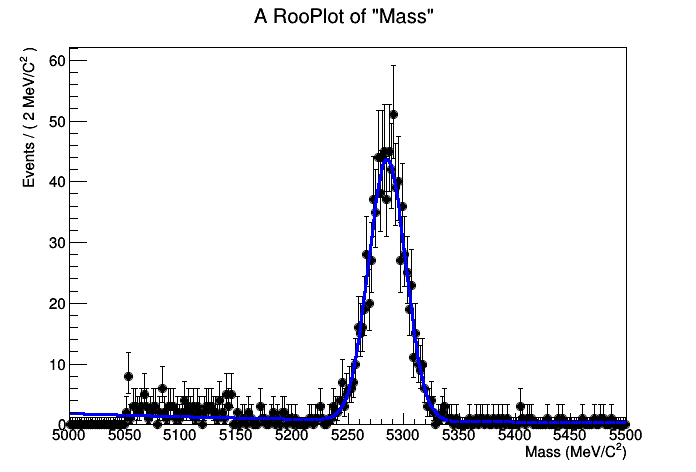

In [17]:
#Factory reset time function --> with that we can reform the formulation for the RooRealVar. 

import ROOT
#First we define our physical measurement we want to fit using the RooRealVar
# variable=ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass= ROOT.RooRealVar("Mass_B(Energy_B, MomentumB)", "Mass", 5000, 5500, "MeV/C^{2}")

#The remainder of the variables we need to pass into our model. E.g. for a gaussian, we need a mean and a width parameter to vary
#For these RooRealVar's we add three numbers, a "starting value" and min/max values

gauss_mean=ROOT.RooRealVar("gauss_mean","Mean",5300,5200,5350)
gauss_width=ROOT.RooRealVar("gauss_width","Width",3,0,60)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gauss_mean,gauss_width)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.1, 0, 1)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(sig_frac))

data_to_fit=ROOT.RooDataHist("Mass_B","Masshistogram",ROOT.RooArgList(mass), histogramSel, 1)

#Then we can do the fitting:

model.fitTo(data_to_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)

frame.Draw()
c1.Update()
c1.Draw()

Model_yield= model.getValV()
Gauss_yield = Gauss.getValV()

In [18]:
Model_yield= model.getValV()
Gauss_yield = Gauss.getValV()
#Exp_yield = Bkgnd.getValv()

print(Model_yield, Gauss_yield) #here we can see that there is a influence on the value for the exponential background... Unfortuanly I could not find the error in this part, which is probably the reason why there is no background reducing 

(0.08493337193263613, 0.105807611043635)


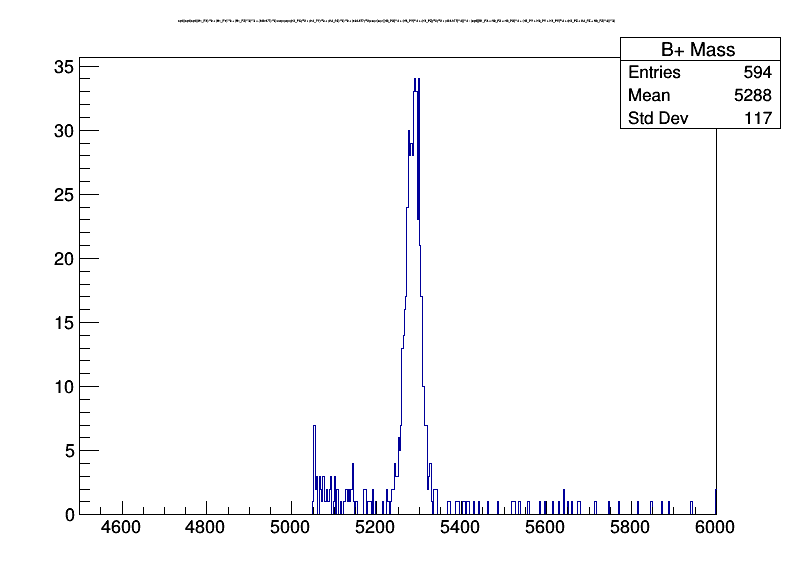

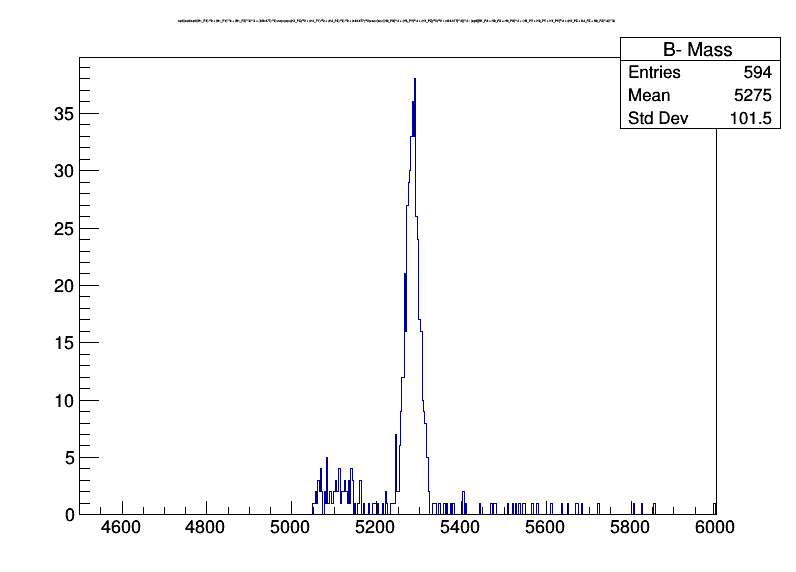

In [19]:
'''PLotting mass of B+ mother particles'''

selection=("(H1_Charge+H2_Charge+H3_Charge)>0") #2 positive and 1 negative = +1
CutTree1=CutTree.CopyTree(selection)

c = ROOT.TCanvas("B+Mass","B+_Mass",800,600)
CutTree1.Draw(Mass_B(Energy_B(Energy_K), MomentumB())+ ">>B+ Mass(500,4500,6000)")
bplusmass_histo = ROOT.gDirectory.Get("B+ Mass")

c.Draw()

'''PLotting mass of B- mother particles'''

selection=("(H1_Charge+H2_Charge+H3_Charge)<0") #2 negative and a 1 positive = -1
CutTree2=CutTree.CopyTree(selection)

b = ROOT.TCanvas("B-Mass","B-_Mass",800,600)
CutTree2.Draw(Mass_B(Energy_B(Energy_K), MomentumB())+ ">>B- Mass(500,4500,6000)")
bminusmass_histo = ROOT.gDirectory.Get("B- Mass")

b.Draw()

(0.09575169103128131, 0.1172660079307423)
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B+_Mass): fit range of variable Mass_B(Energy_B, MomentumB) expanded to nearest bin boundaries: [5000,5500] --> [4998,5502]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   8.02715e-01  1.35885e-02    0.00000e+00  1.00000e+00
     2 exponent    -3.49692e-03  5.38429e-04   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.28522e+03  5.91672e-01    5.20000e+03  5.35000e+03
     4 gauss_width   1.66165e+01  4.72934e-01    0.00000e+00  6.00000e+01
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


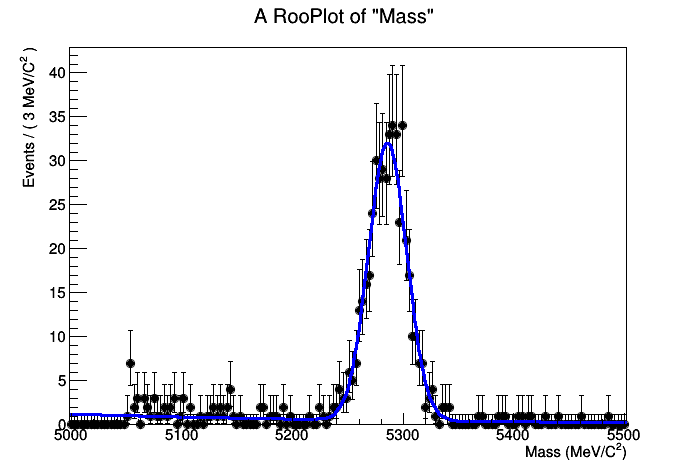

In [20]:
B_plus_fit = ROOT.RooDataHist("B+_Mass", "Mass", ROOT.RooArgList(mass), bplusmass_histo, 1.0)
#Then we can do the fitting:

model.fitTo(B_plus_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
B_plus_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()
print(model.getValV(),Gauss.getValV())

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B-_Mass): fit range of variable Mass_B(Energy_B, MomentumB) expanded to nearest bin boundaries: [4998,5502] --> [4998,5502]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   8.16534e-01  1.89389e-02    0.00000e+00  1.00000e+00
     2 exponent    -3.12491e-03  7.72146e-04   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.28586e+03  8.66680e-01    5.20000e+03  5.35000e+03
     4 gauss_width   1.73183e+01  7.04743e-01    0.00000e+00  6.00000e+01
 **********
 **   21 **SET ERR         0.5
 **********
 **********
 **   22 **SET PRINT           1
 **********
 **********


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


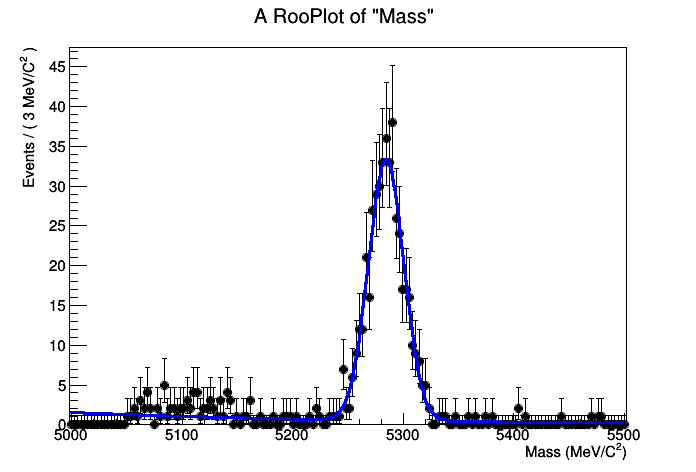

In [21]:
B_minus_fit=ROOT.RooDataHist("B-_Mass", "BMass", ROOT.RooArgList(mass), bminusmass_histo, 1.0)
#Then we can do the fitting:

model.fitTo(B_minus_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
B_minus_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()
B_minus_yield = model.getValV()*CutTree2.GetEntries()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data_to_fit): fit range of variable mass expanded to nearest bin boundaries: [5000,6000] --> [5000,6000]


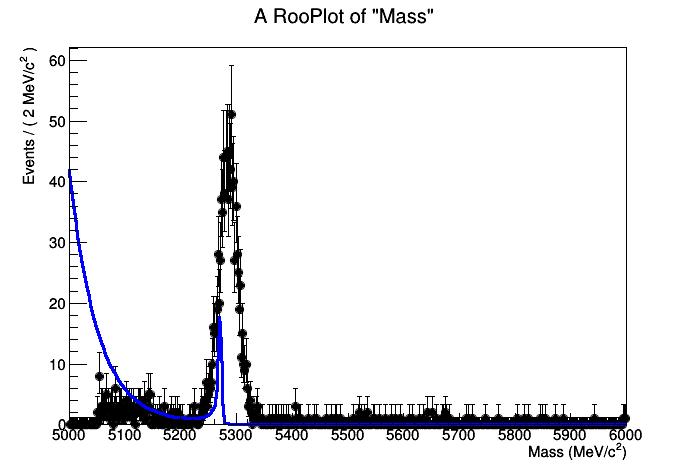

In [22]:
#Other curve fitting (not completely right)
# general formulas needed for curve fitting 

bins = 200
xmin = 5000
xmax = 6000

# Define the 'independent' variable, or x-axis
mass        = ROOT.RooRealVar("mass","Mass",xmin, xmax,"MeV/c^{2}")

exponential_c = ROOT.RooRealVar("exponential_c","C", -0.02, -1, 1)
myexponential = ROOT.RooExponential("myexponential","Exponential", mass, exponential_c)

# Build the variables for the Gaussian
#  Syntax is RooRealVar("name","title",initial_value,minrange,maxrange)
gauss_mean  = ROOT.RooRealVar("gauss_mean","Mean",5270,5200,5350)
gauss_width = ROOT.RooRealVar("gauss_width","Width",3,0,60)
myGauss     = ROOT.RooGaussian("myGauss","Gaussian", mass, gauss_mean, gauss_width)

# Build the variables for the Crystal Ball
cb_width    = ROOT.RooRealVar("cb_width","CB Width",3,0,60)
cb_alpha    = ROOT.RooRealVar("cb_alpha","Exp.const",1.0,0.0,5.0)
cb_n        = ROOT.RooRealVar("cb_n","Exp.crossover",1.0,0.0,5.0)
# these are all the parameters required by a crystal ball shape
myCB        = ROOT.RooCBShape("myCB","Crystal Ball", mass, gauss_mean, cb_width, cb_alpha, cb_n)

#Normalizing of the signal 
sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.1, 0, 1)

#Actual forming of the signal
model1 = ROOT.RooAddPdf ("Full Model","model1", ROOT.RooArgList(myGauss, myCB), ROOT.RooArgList(sig_frac))

signalshape = ROOT.RooAddPdf("signalshape","Signal shape", ROOT.RooArgList(model1, myexponential), ROOT.RooArgList(sig_frac) )

data_to_fit = ROOT.RooDataHist("data_to_fit","Masshistogram", ROOT.RooArgList(mass), histogramSel, 1)

c2=ROOT.TCanvas("c2","c2")
frame = mass.frame()
data_to_fit.plotOn(frame)
signalshape.plotOn(frame)

frame.Draw()
c2.Update()
c2.Draw()